<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
 - Identify outliers and quantify them columns that contain outliers
>- 5) EDA
>- 6) Transform data if needed
>- 7) Kmeans Clustering 
    - determine silhouette coeff 
    - plot elbow method graph
    - plot overlay of each ditance metric to determine best k value
>- 8) Hierarchial Clustering
    - detemine coph correlation for each distance metric and linkage method
    - plot dendograms with each linkage method using
    - compare 
>- 9) compare and contrast Hierarchial vs KMEANS
>- 10) Conclusion and business insight. 


### Import libraries needed

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

# import function

%matplotlib inline
import seaborn as sns


# import scaling 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# import libraries for distance calculations within clusters 
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform kmeans clustering, and computing silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# import sklearn.metrics


from google.colab import files
import io


# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_excel(io.BytesIO(uploaded['Credit Card Customer Data.xlsx']))

data.shape

Saving Credit Card Customer Data.xlsx to Credit Card Customer Data.xlsx


(660, 7)

### Data Dict

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
# drop the  Sl_no and customer key column as this will add no value to the cluster analysis
data = data.drop(["Sl_No","Customer Key"], axis = 1)
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
# insights for the descriptive stats: Avg Credit card and total visits online appear to have outliers
#  - This is due to the fact that the median and mean values are quite different. In credit limit there's 
# a diff. of approx 18,000 and with total visits_online there is a smaller differnece.  

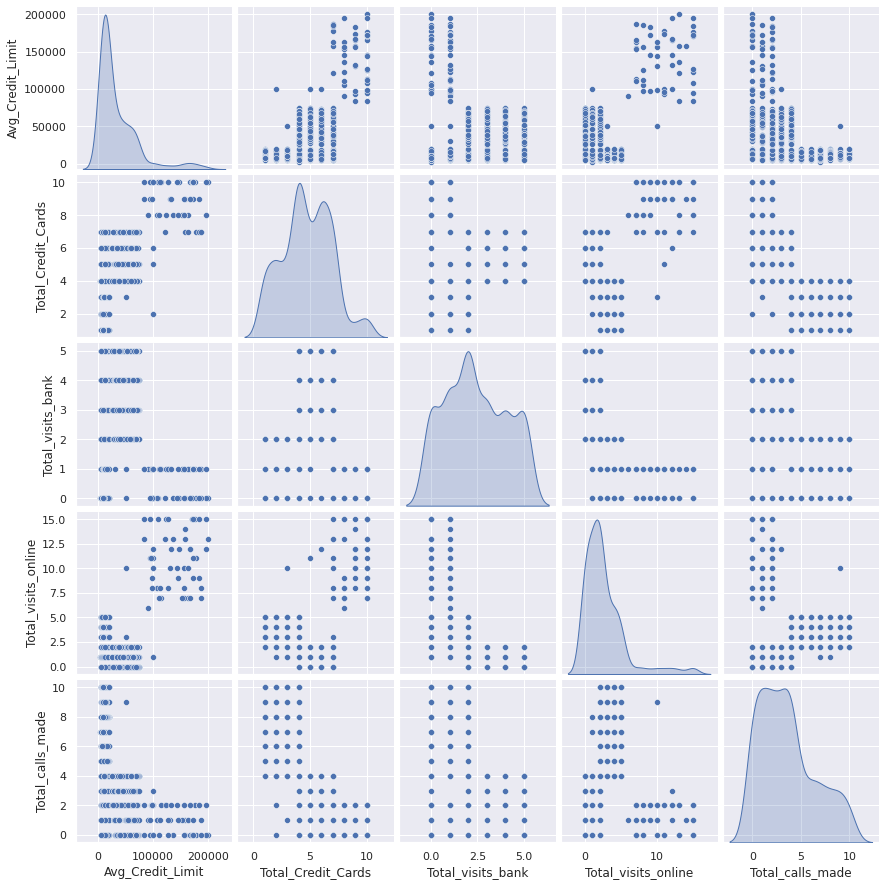

In [8]:
sns.pairplot(data,diag_kind = 'kde')

In [9]:
# insights for total visits online and avg credit limit distributions. Both of these distributions 
# are right skewed as we saw in the .describe function.

In [10]:
# check for missing values

In [11]:
  print(100*(data['Avg_Credit_Limit'].isnull().sum()/len(data['Avg_Credit_Limit'])))
  print(data["Avg_Credit_Limit"].name)
  print("-"*60)

0.0
Avg_Credit_Limit
------------------------------------------------------------


In [12]:
# make copies of original dataset to remove and not remove outliers

out_data = data.copy()
tmp_data = data.copy()

In [13]:
# identify outliers 
# use IQR to identify outliers. calculate 1st and 2nd quartile, then identify data points that are outside
# of the 4 * IQR range
credit_quartiles =np.quantile(out_data['Avg_Credit_Limit'][out_data['Avg_Credit_Limit'].notnull()], [.25, .75])
credit_quartiles_iqr = 4 * (credit_quartiles[1] - credit_quartiles[0])
visits_quartiles =np.quantile(out_data['Total_visits_online'][out_data['Total_visits_online'].notnull()], [.25, .75])
visits_quartiles_iqr = 4 * (visits_quartiles[1] - visits_quartiles[0])
# define the outlier

credit_outlier = out_data.loc[np.abs(out_data["Avg_Credit_Limit"]-out_data["Avg_Credit_Limit"].median()) > credit_quartiles_iqr, "Avg_Credit_Limit"]
online_visits_outlier = out_data.loc[np.abs(out_data["Total_visits_online"]-out_data["Total_visits_online"].median()) > visits_quartiles_iqr, "Total_visits_online"]
len(online_visits_outlier)+len(credit_outlier)


23

### outlier treatment 
- since the data is only 660 rows long and removing 23 rows of the original dataset will of 3.5% of the total dataset, outliers will be left in the dataset

In [14]:
tmp_data.shape

(660, 5)

In [15]:
cat_list = list(tmp_data.columns)
cat_list.remove("Avg_Credit_Limit")

In [16]:
for col in cat_list:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

0.0
Total_Credit_Cards
------------------------------------------------------------
0.0
Total_visits_bank
------------------------------------------------------------
0.0
Total_visits_online
------------------------------------------------------------
0.0
Total_calls_made
------------------------------------------------------------


# Identify missing data in each of the cat_columns
-There is no missing data in this data set
- This would report the percentage of missing data if there was any for each column 

In [17]:
# define categorical column list. 

cat_list

['Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [18]:
### 3) Univariate analysis

In [19]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##################################################
Customers with the 4,6,7 atttribute to the majority of the total credit cards within the customers
##################################################


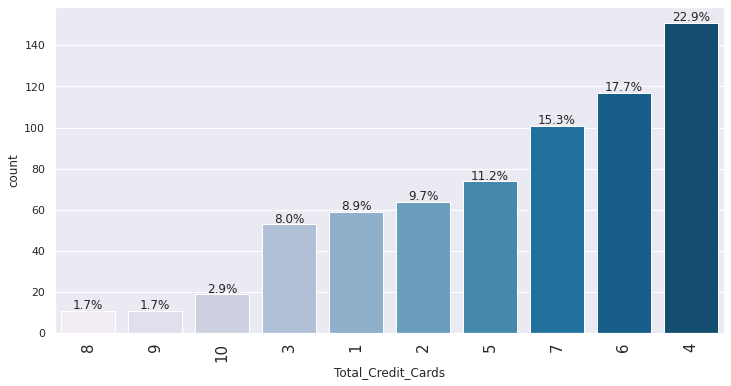

##################################################
1 and 2 visits attribute to the most of the bank visits
##################################################


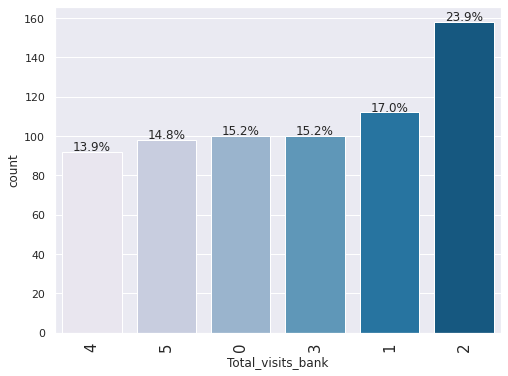

##################################################
0-2 visits online attribute to the majority of the online traffic The customers don't really like going on the web
##################################################


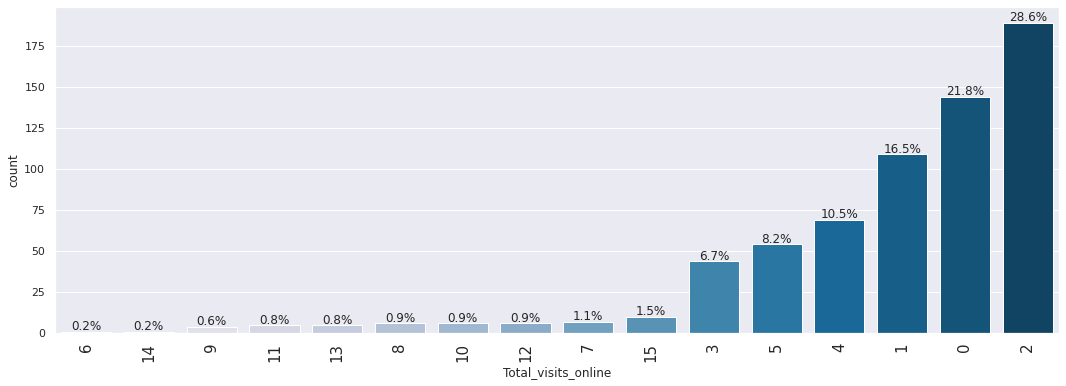

##################################################
approx 70% of the customers fall within 0-4 calls made
##################################################


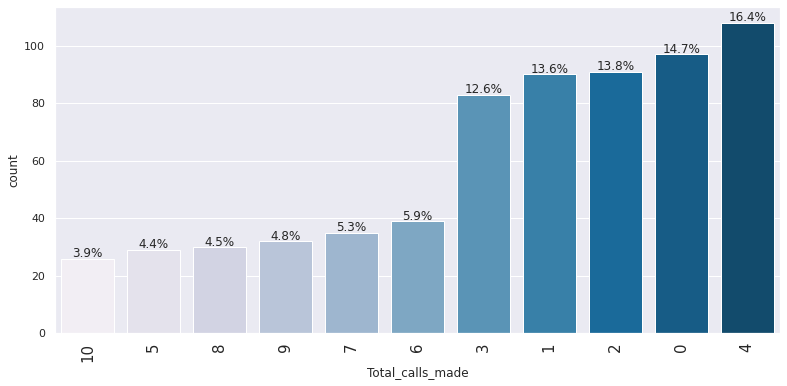

In [20]:
for feature in cat_list:
  if feature == "Total_visits_bank":
    print("#"*50)
    print("1 and 2 visits attribute to the most of the bank visits")
    print("#"*50)
  elif feature == "Total_Credit_Cards":
    print("#"*50)
    print("Customers with the 4,6,7 atttribute to the majority of the total credit cards", 
    "within the customers")
    print("#"*50)
  elif feature == "Total_visits_online":
    print("#"*50)
    print("0-2 visits online attribute to the majority of the online traffic", 
    "The customers don't really like going on the web")
    print("#"*50)
  elif feature == "Total_calls_made":
    print("#"*50)
    print("approx 70% of the customers fall within 0-4 calls made")
    print("#"*50)
  labeled_barplot(tmp_data, feature, perc=True)
  


In [21]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [22]:
cat_list

['Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_Credit_Cards                                                
8                    0   0   0    0   0    0    0  11   0   0   11
All                 59  64  53  151  74  117  101  11  11  19  660
1                   59   0   0    0   0    0    0   0   0   0   59
2                    0  64   0    0   0    0    0   0   0   0   64
3                    0   0  53    0   0    0    0   0   0   0   53
4                    0   0   0  151   0    0    0   0   0   0  151
5                    0   0   0    0  74    0    0   0   0   0   74
6                    0   0   0    0   0  117    0   0   0   0  117
7                    0   0   0    0   0    0  101   0   0   0  101
9                    0   0   0    0   0    0    0   0  11   0   11
10                   0   0   0    0   0    0    0   0   0  19   19
------------------------------------------------------------------------------------------------------------------------


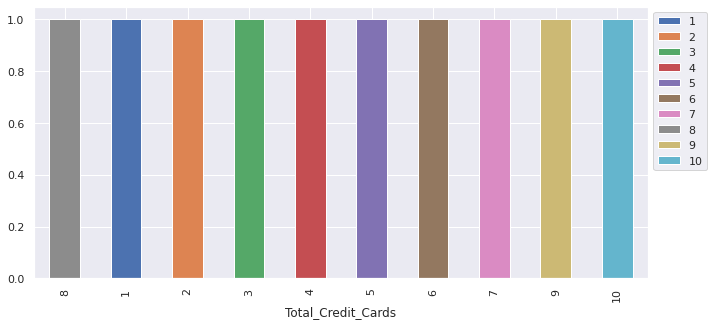

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_visits_bank                                                 
All                 59  64  53  151  74  117  101  11  11  19  660
1                   21  19  18   22   1    0    4   7   8  12  112
0                   21  25  21   13   1    1    4   4   3   7  100
2                   17  20  14   35  24   24   24   0   0   0  158
3                    0   0   0   26  15   34   25   0   0   0  100
4                    0   0   0   27  18   24   23   0   0   0   92
5                    0   0   0   28  15   34   21   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


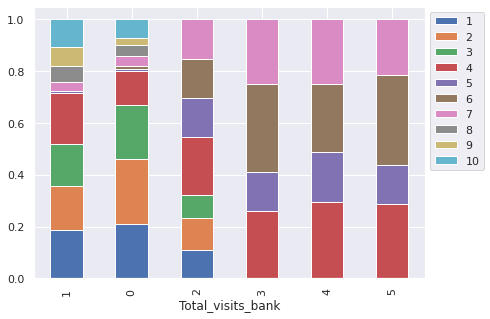

Total_Credit_Cards    1   2   3    4   5    6    7   8   9  10  All
Total_visits_online                                                
All                  59  64  53  151  74  117  101  11  11  19  660
7                     0   0   0    0   0    0    1   4   0   2    7
15                    0   0   0    0   0    0    1   2   1   6   10
8                     0   0   0    0   0    0    1   2   1   2    6
6                     0   0   0    0   0    0    0   1   0   0    1
9                     0   0   0    0   0    0    0   1   1   2    4
13                    0   0   0    0   0    0    2   1   0   2    5
4                    17  18  14   20   0    0    0   0   0   0   69
5                    15  16  16    7   0    0    0   0   0   0   54
3                     9  15   8   11   0    0    1   0   0   0   44
1                     0   1   2   25  23   38   20   0   0   0  109
10                    0   0   1    0   0    0    1   0   2   2    6
11                    0   0   0    0   1    0   

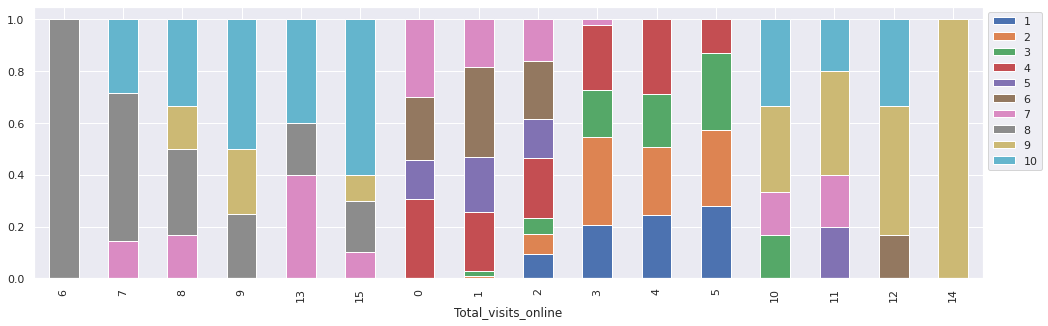

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_calls_made                                                  
All                 59  64  53  151  74  117  101  11  11  19  660
1                    0   0   1   22  14   22   18   5   2   6   90
0                    0   1   0   23  13   27   20   4   3   6   97
2                    0   1   0   21  15   20   19   2   6   7   91
3                    0   0   0   19  14   30   20   0   0   0   83
4                    6  12   7   23  18   18   24   0   0   0  108
5                    8   7   8    6   0    0    0   0   0   0   29
6                    7  11  13    8   0    0    0   0   0   0   39
7                   12   8   6    9   0    0    0   0   0   0   35
8                    7  12   4    7   0    0    0   0   0   0   30
9                   10   6   9    7   0    0    0   0   0   0   32
10                   9   6   5    6   0    0    0   0   0   0   26
--------------------------------------------------------------

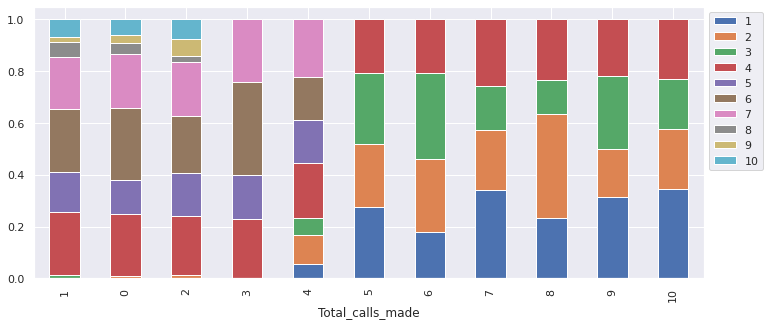

In [23]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_Credit_Cards")

Total_visits_bank     0    1    2    3   4   5  All
Total_Credit_Cards                                 
All                 100  112  158  100  92  98  660
4                    13   22   35   26  27  28  151
6                     1    0   24   34  24  34  117
7                     4    4   24   25  23  21  101
5                     1    1   24   15  18  15   74
1                    21   21   17    0   0   0   59
2                    25   19   20    0   0   0   64
3                    21   18   14    0   0   0   53
8                     4    7    0    0   0   0   11
9                     3    8    0    0   0   0   11
10                    7   12    0    0   0   0   19
------------------------------------------------------------------------------------------------------------------------


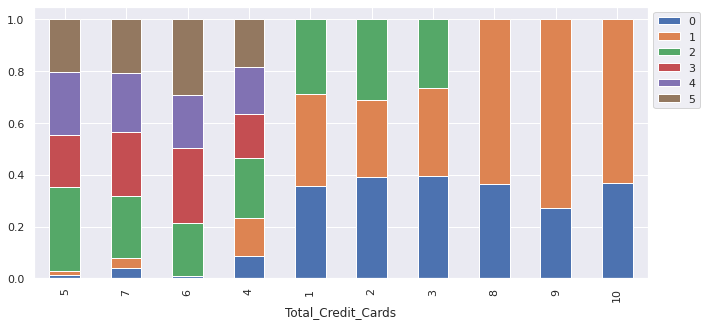

Total_visits_bank    0    1    2    3   4   5  All
Total_visits_bank                                 
4                    0    0    0    0  92   0   92
All                100  112  158  100  92  98  660
0                  100    0    0    0   0   0  100
1                    0  112    0    0   0   0  112
2                    0    0  158    0   0   0  158
3                    0    0    0  100   0   0  100
5                    0    0    0    0   0  98   98
------------------------------------------------------------------------------------------------------------------------


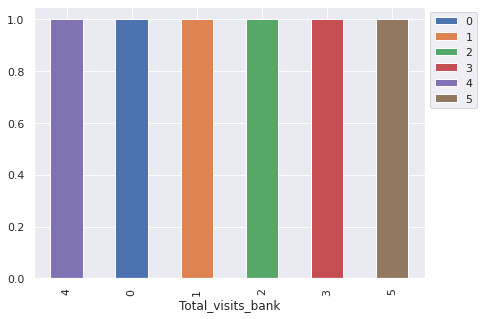

Total_visits_bank      0    1    2    3   4   5  All
Total_visits_online                                 
All                  100  112  158  100  92  98  660
2                     20   15   45   35  38  36  189
0                      0    0   40   32  31  41  144
1                      3    2   27   33  23  21  109
3                     17   11   16    0   0   0   44
4                     23   30   16    0   0   0   69
5                     16   24   14    0   0   0   54
6                      0    1    0    0   0   0    1
7                      2    5    0    0   0   0    7
9                      1    3    0    0   0   0    4
10                     2    4    0    0   0   0    6
11                     2    3    0    0   0   0    5
12                     3    3    0    0   0   0    6
13                     4    1    0    0   0   0    5
14                     0    1    0    0   0   0    1
15                     4    6    0    0   0   0   10
8                      3    3    0    0   0   

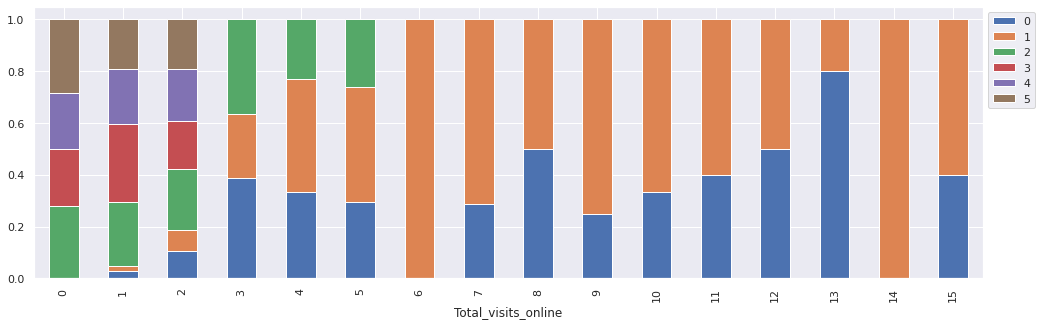

Total_visits_bank    0    1    2    3   4   5  All
Total_calls_made                                  
All                100  112  158  100  92  98  660
3                    1    0   18   21  23  20   83
0                    7   10   19   21  21  19   97
1                    6   10   14   19  19  22   90
2                    8   11   21   18  18  15   91
4                   10   15   29   21  11  22  108
5                   10   10    9    0   0   0   29
6                   10   14   15    0   0   0   39
7                   13   12   10    0   0   0   35
8                   11    9   10    0   0   0   30
9                   12   12    8    0   0   0   32
10                  12    9    5    0   0   0   26
------------------------------------------------------------------------------------------------------------------------


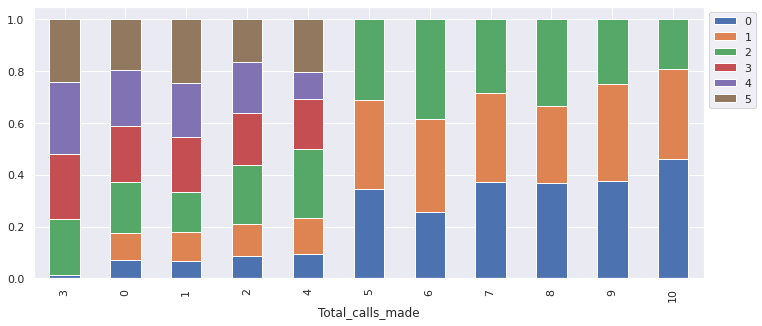

In [24]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_visits_bank")

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_Credit_Cards                                                           
8                      0    0    0   0   0   0  1  4  2  1   0   0   0   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
1                      0    0   18   9  17  15  0  0  0  0   0   0   0   0   
2                      0    1   14  15  18  16  0  0  0  0   0   0   0   0   
3                      0    2   12   8  14  16  0  0  0  0   1   0   0   0   
4                     44   25   44  11  20   7  0  0  0  0   0   0   0   0   
5                     22   23   28   0   0   0  0  0  0  0   0   1   0   0   
6                     35   38   43   0   0   0  0  0  0  0   0   0   1   0   
7                     43   20   30   1   0   0  0  1  1  0   1   1   0   2   
9                      0    0    0   0   0   0  0  0  1  1   2   2   3   0   
10                     0    0    0   0   0   0  0  2  2  2   2  

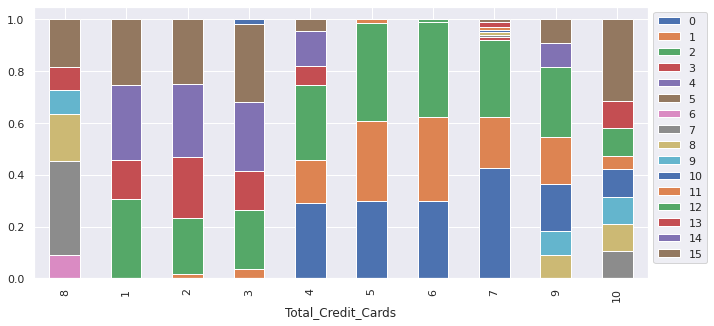

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_visits_bank                                                            
1                      0    2   15  11  30  24  1  5  3  3   4   3   3   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                      0    3   20  17  23  16  0  2  3  1   2   2   3   4   
2                     40   27   45  16  16  14  0  0  0  0   0   0   0   0   
3                     32   33   35   0   0   0  0  0  0  0   0   0   0   0   
4                     31   23   38   0   0   0  0  0  0  0   0   0   0   0   
5                     41   21   36   0   0   0  0  0  0  0   0   0   0   0   

Total_visits_online  14  15  All  
Total_visits_bank                 
1                     1   6  112  
All                   1  10  660  
0                     0   4  100  
2                     0   0  158  
3                     0   0  100  
4                     0   0   92  
5                

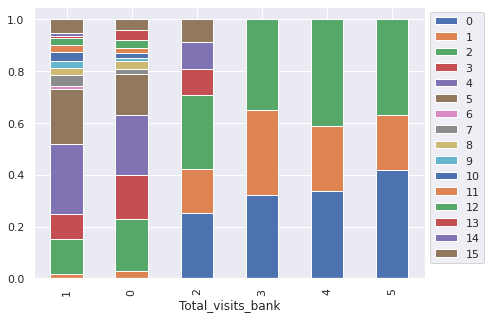

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_visits_online                                                          
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
6                      0    0    0   0   0   0  1  0  0  0   0   0   0   0   
9                      0    0    0   0   0   0  0  0  0  4   0   0   0   0   
15                     0    0    0   0   0   0  0  0  0  0   0   0   0   0   
14                     0    0    0   0   0   0  0  0  0  0   0   0   0   0   
13                     0    0    0   0   0   0  0  0  0  0   0   0   0   5   
12                     0    0    0   0   0   0  0  0  0  0   0   0   6   0   
11                     0    0    0   0   0   0  0  0  0  0   0   5   0   0   
10                     0    0    0   0   0   0  0  0  0  0   6   0   0   0   
0                    144    0    0   0   0   0  0  0  0  0   0   0   0   0   
1                      0  109    0   0   0   0  0  0  0  0   0  

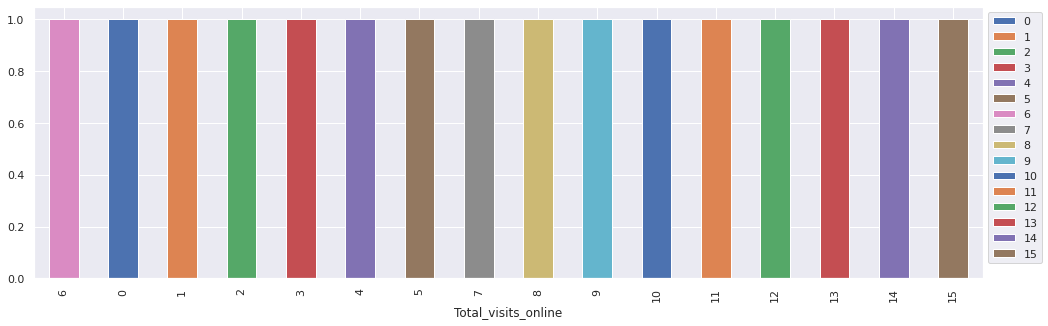

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_calls_made                                                             
1                     26   16   33   0   0   0  1  2  3  2   2   0   1   0   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                     30   30   21   0   0   0  0  3  2  0   1   3   0   3   
2                     27   19   27   0   0   0  0  2  1  2   2   2   4   2   
3                     26   18   38   0   0   0  0  0  0  0   0   0   1   0   
4                     35   24   26   7  10   6  0  0  0  0   0   0   0   0   
5                      0    0    9   5   6   9  0  0  0  0   0   0   0   0   
6                      0    0    9   7  15   8  0  0  0  0   0   0   0   0   
7                      0    1    9   9  10   6  0  0  0  0   0   0   0   0   
8                      0    1    5   5  10   9  0  0  0  0   0   0   0   0   
9                      0    0    4   3  13  11  0  0  0  0   1  

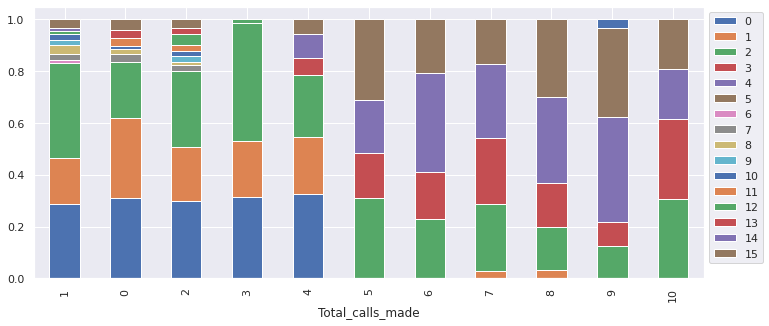

In [25]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_visits_online")

### insights

- more online visits to the bank imply less visits to the bank 
- more banks visits transpires to less credit cards owned
- as calls increase, so does the amount of visits online increase

Total_calls_made     0   1   2   3    4   5   6   7   8   9  10  All
Total_Credit_Cards                                                  
All                 97  90  91  83  108  29  39  35  30  32  26  660
1                    0   0   0   0    6   8   7  12   7  10   9   59
2                    1   0   1   0   12   7  11   8  12   6   6   64
4                   23  22  21  19   23   6   8   9   7   7   6  151
3                    0   1   0   0    7   8  13   6   4   9   5   53
5                   13  14  15  14   18   0   0   0   0   0   0   74
6                   27  22  20  30   18   0   0   0   0   0   0  117
7                   20  18  19  20   24   0   0   0   0   0   0  101
8                    4   5   2   0    0   0   0   0   0   0   0   11
9                    3   2   6   0    0   0   0   0   0   0   0   11
10                   6   6   7   0    0   0   0   0   0   0   0   19
-------------------------------------------------------------------------------------------------------

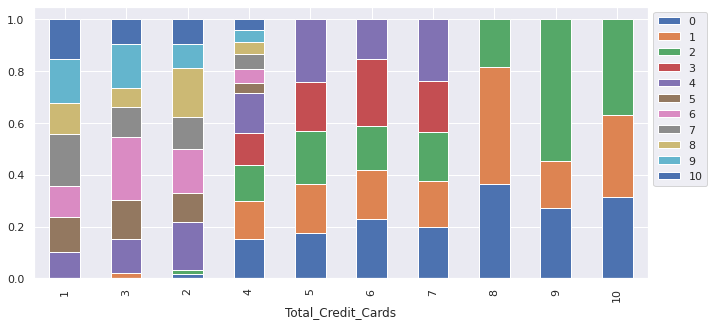

Total_calls_made    0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_bank                                                  
All                97  90  91  83  108  29  39  35  30  32  26  660
0                   7   6   8   1   10  10  10  13  11  12  12  100
1                  10  10  11   0   15  10  14  12   9  12   9  112
2                  19  14  21  18   29   9  15  10  10   8   5  158
3                  21  19  18  21   21   0   0   0   0   0   0  100
4                  21  19  18  23   11   0   0   0   0   0   0   92
5                  19  22  15  20   22   0   0   0   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


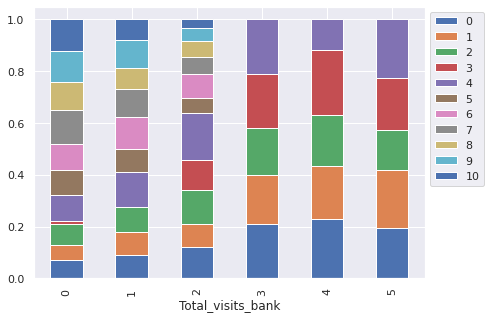

Total_calls_made      0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_online                                                  
All                  97  90  91  83  108  29  39  35  30  32  26  660
2                    21  33  27  38   26   9   9   9   5   4   8  189
3                     0   0   0   0    7   5   7   9   5   3   8   44
4                     0   0   0   0   10   6  15  10  10  13   5   69
5                     0   0   0   0    6   9   8   6   9  11   5   54
11                    3   0   2   0    0   0   0   0   0   0   0    5
15                    4   3   3   0    0   0   0   0   0   0   0   10
14                    0   1   0   0    0   0   0   0   0   0   0    1
13                    3   0   2   0    0   0   0   0   0   0   0    5
12                    0   1   4   1    0   0   0   0   0   0   0    6
0                    30  26  27  26   35   0   0   0   0   0   0  144
10                    1   2   2   0    0   0   0   0   0   1   0    6
9                   

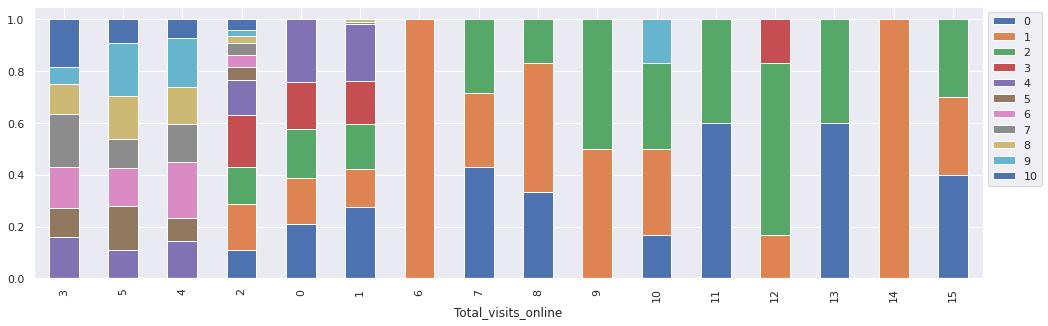

Total_calls_made   0   1   2   3    4   5   6   7   8   9  10  All
Total_calls_made                                                  
10                 0   0   0   0    0   0   0   0   0   0  26   26
All               97  90  91  83  108  29  39  35  30  32  26  660
0                 97   0   0   0    0   0   0   0   0   0   0   97
1                  0  90   0   0    0   0   0   0   0   0   0   90
2                  0   0  91   0    0   0   0   0   0   0   0   91
3                  0   0   0  83    0   0   0   0   0   0   0   83
4                  0   0   0   0  108   0   0   0   0   0   0  108
5                  0   0   0   0    0  29   0   0   0   0   0   29
6                  0   0   0   0    0   0  39   0   0   0   0   39
7                  0   0   0   0    0   0   0  35   0   0   0   35
8                  0   0   0   0    0   0   0   0  30   0   0   30
9                  0   0   0   0    0   0   0   0   0  32   0   32
--------------------------------------------------------------

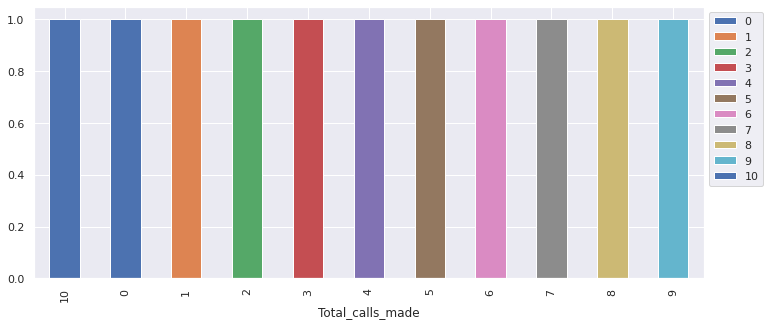

In [26]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_calls_made")

### Insights

- As the number of credit cards increase, the total calls made decreases. 
- the highest number of calls are attributed from customers that have 0 - 2 visits to the bank.

Total_calls_made     0   1   2   3    4   5   6   7   8   9  10  All
Total_Credit_Cards                                                  
All                 97  90  91  83  108  29  39  35  30  32  26  660
1                    0   0   0   0    6   8   7  12   7  10   9   59
2                    1   0   1   0   12   7  11   8  12   6   6   64
4                   23  22  21  19   23   6   8   9   7   7   6  151
3                    0   1   0   0    7   8  13   6   4   9   5   53
5                   13  14  15  14   18   0   0   0   0   0   0   74
6                   27  22  20  30   18   0   0   0   0   0   0  117
7                   20  18  19  20   24   0   0   0   0   0   0  101
8                    4   5   2   0    0   0   0   0   0   0   0   11
9                    3   2   6   0    0   0   0   0   0   0   0   11
10                   6   6   7   0    0   0   0   0   0   0   0   19
-------------------------------------------------------------------------------------------------------

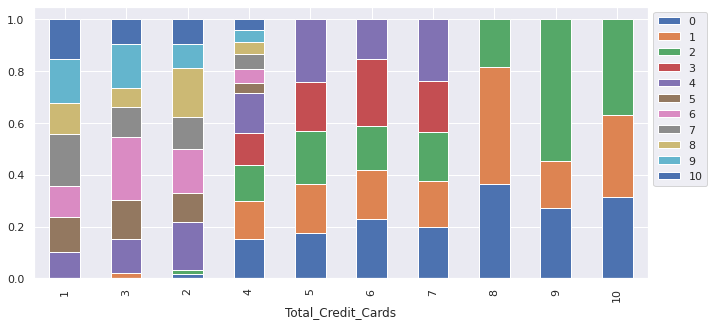

Total_calls_made    0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_bank                                                  
All                97  90  91  83  108  29  39  35  30  32  26  660
0                   7   6   8   1   10  10  10  13  11  12  12  100
1                  10  10  11   0   15  10  14  12   9  12   9  112
2                  19  14  21  18   29   9  15  10  10   8   5  158
3                  21  19  18  21   21   0   0   0   0   0   0  100
4                  21  19  18  23   11   0   0   0   0   0   0   92
5                  19  22  15  20   22   0   0   0   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


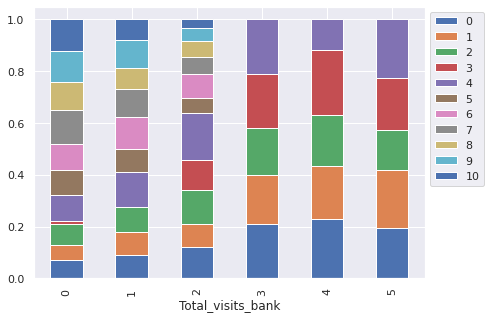

Total_calls_made      0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_online                                                  
All                  97  90  91  83  108  29  39  35  30  32  26  660
2                    21  33  27  38   26   9   9   9   5   4   8  189
3                     0   0   0   0    7   5   7   9   5   3   8   44
4                     0   0   0   0   10   6  15  10  10  13   5   69
5                     0   0   0   0    6   9   8   6   9  11   5   54
11                    3   0   2   0    0   0   0   0   0   0   0    5
15                    4   3   3   0    0   0   0   0   0   0   0   10
14                    0   1   0   0    0   0   0   0   0   0   0    1
13                    3   0   2   0    0   0   0   0   0   0   0    5
12                    0   1   4   1    0   0   0   0   0   0   0    6
0                    30  26  27  26   35   0   0   0   0   0   0  144
10                    1   2   2   0    0   0   0   0   0   1   0    6
9                   

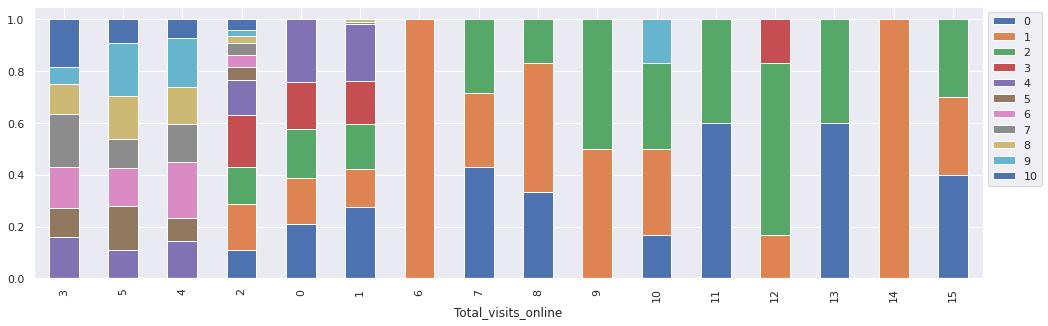

Total_calls_made   0   1   2   3    4   5   6   7   8   9  10  All
Total_calls_made                                                  
10                 0   0   0   0    0   0   0   0   0   0  26   26
All               97  90  91  83  108  29  39  35  30  32  26  660
0                 97   0   0   0    0   0   0   0   0   0   0   97
1                  0  90   0   0    0   0   0   0   0   0   0   90
2                  0   0  91   0    0   0   0   0   0   0   0   91
3                  0   0   0  83    0   0   0   0   0   0   0   83
4                  0   0   0   0  108   0   0   0   0   0   0  108
5                  0   0   0   0    0  29   0   0   0   0   0   29
6                  0   0   0   0    0   0  39   0   0   0   0   39
7                  0   0   0   0    0   0   0  35   0   0   0   35
8                  0   0   0   0    0   0   0   0  30   0   0   30
9                  0   0   0   0    0   0   0   0   0  32   0   32
--------------------------------------------------------------

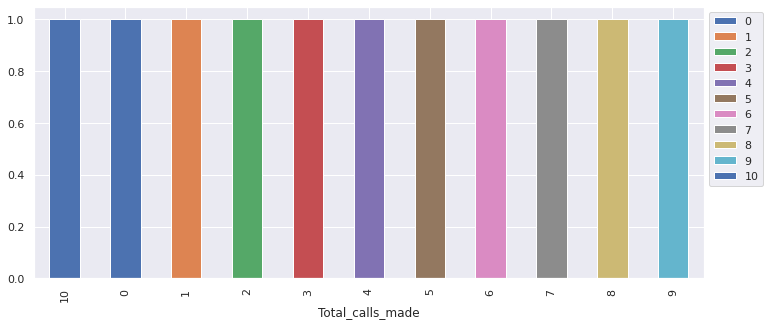

In [27]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_calls_made")

In [28]:

def histogram_boxplot(data, feature,hue, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: show kernel density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,hue=hue, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

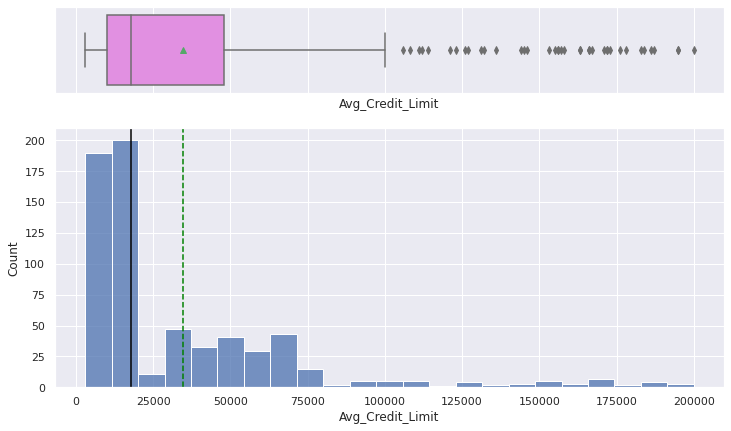

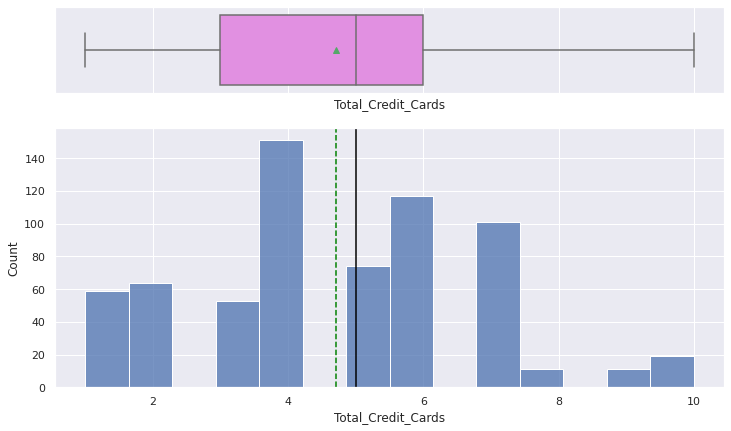

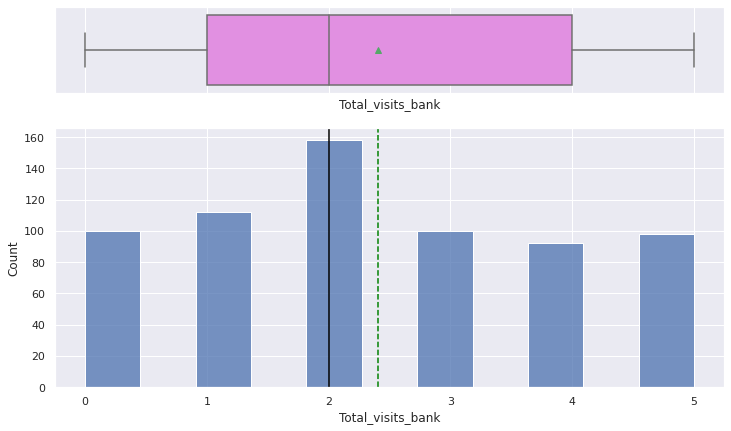

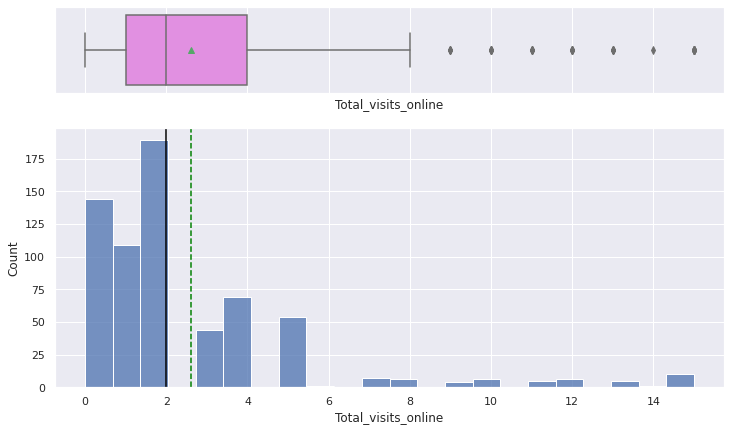

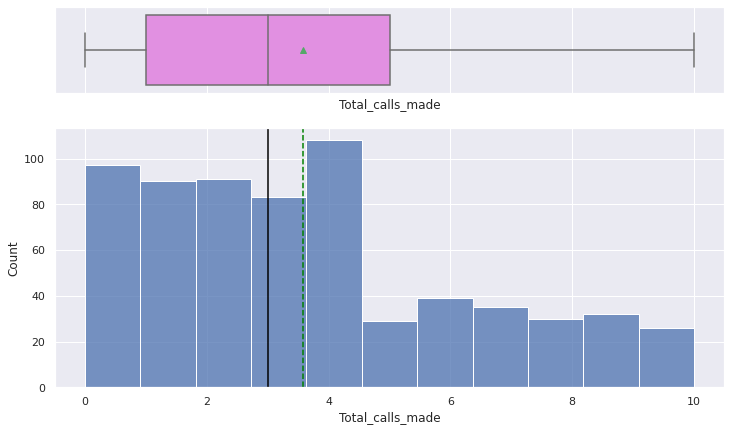

In [29]:
for i in tmp_data.columns: 
  histogram_boxplot(tmp_data, i, hue = None)

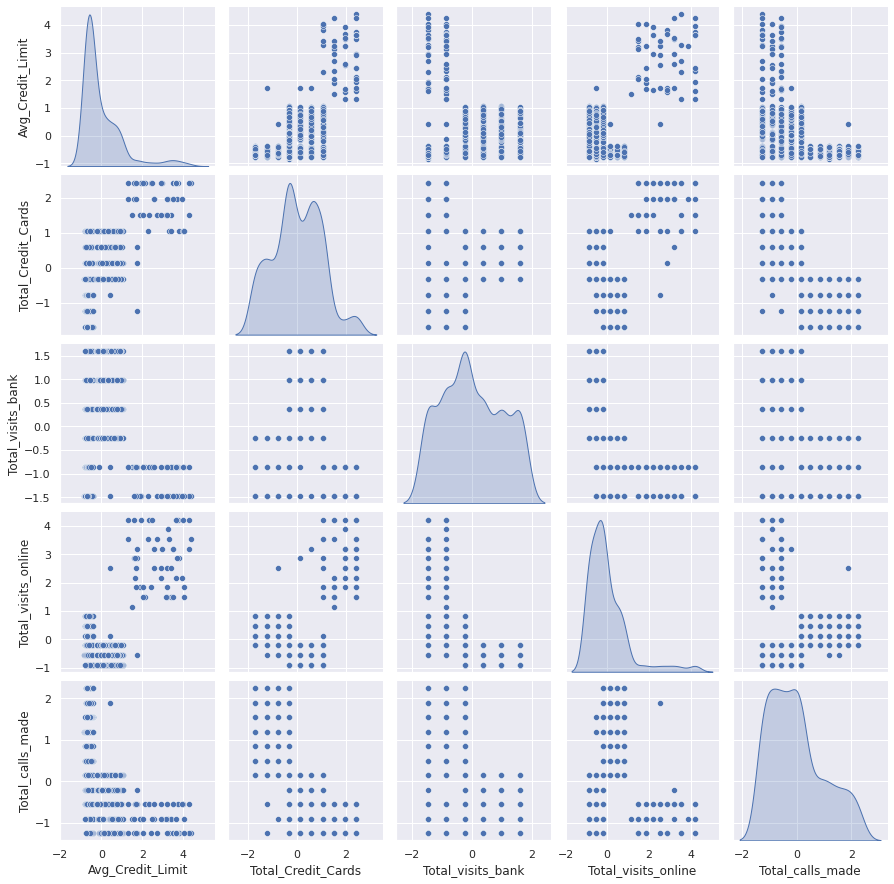

In [30]:
### Process the data 
# scale the data using zscore scaler by using the apply function

tmp_data_Scaled=tmp_data.apply(zscore)
# look at the pair plot to identify the different distributions within the data and the scatterplots
# from eeach possible relationship
sns.pairplot(tmp_data_Scaled,diag_kind='kde')

In [62]:

# look at the correlation between each variable
df_corr_scaled = tmp_data_Scaled.corr()
df_corr = data.corr()
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

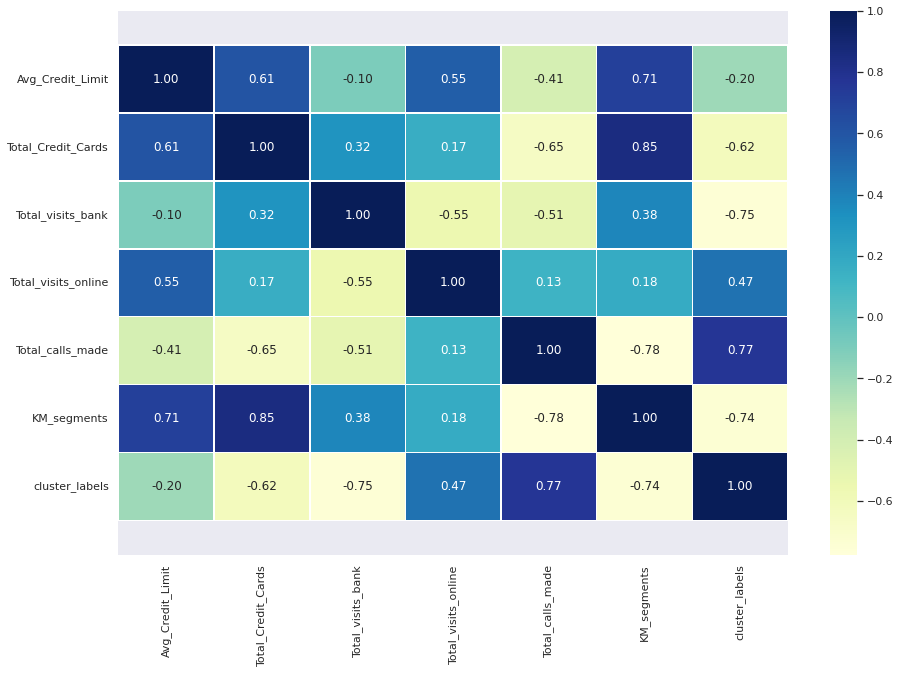

In [59]:
make_corr_matrix(df_corr_scaled)

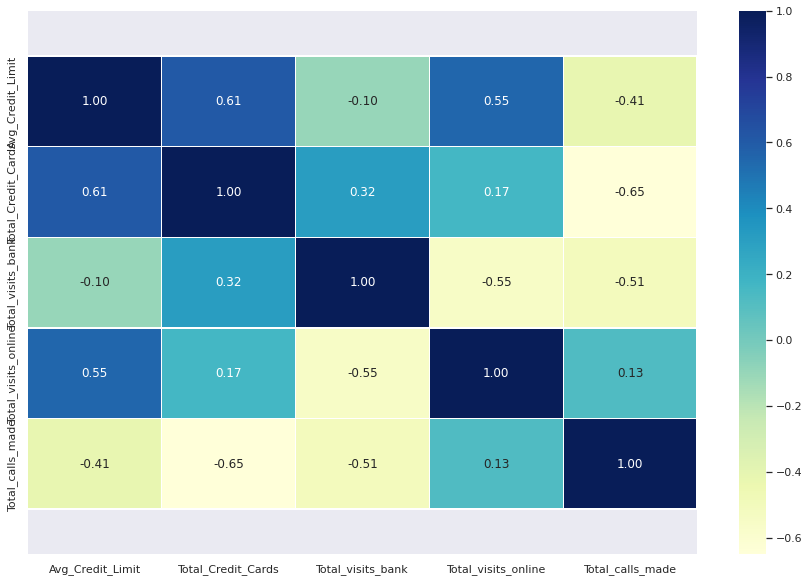

In [64]:
make_corr_matrix(df_corr)

In [ ]:
# insights on correlation matrix: 
# total visits online vs Avg _credit limit show a positive relation 
# tota # of credit cards vs Avg_credit limit show a positive relation 
# - this makes sense for both relations as more visits online, translate to more credit
# - more credit card use.
# - As more customers visit online the average credit limit increases.

### insights 

- the average credit limit distribution appears to be right skewed.
- given the small amount of data, it is probably best not to remove any samples as we will be faced with overfitting if we get rid of too much of the data.
This will give us poor results in real world scenarios deploying the model. 

### Kmeans Cluster Analyis

Text(0.5, 1.0, 'selecting k with the elbow method')

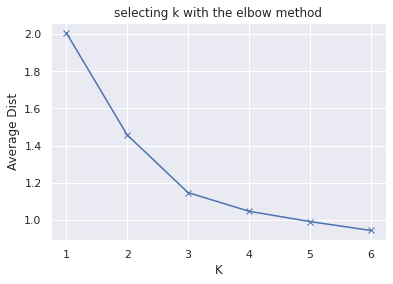

In [31]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# Use euclidean for distance calculation

# define a range for the number of clusters to iterate over
clusters = range(1,7)
# define an empty list for the mean distortions that will get calculated below 
euc_meanDistortions =[]

# iterate through the range for the number of clusters
for k in clusters: 

  # define the model
    euc_model = KMeans(n_clusters=k)

    euc_model.fit(tmp_data_Scaled)
  # fit the model on the scaled data 
    prediction=euc_model.predict(tmp_data_Scaled)
  # make predictions on the tmp scaled data after it has been fit
  euc_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,euc_model.cluster_centers_,"euclidean"),axis=1))/tmp_data_Scaled.shape[0])
    # use the two arrays tmp_data_scaled and euc_model.cluster_centers_ to calculate the distance between each pair of values
    # divide that by the number of rows in the tmp_data_Scaled df
    # then take the sum of the minumum distance computed then append that in the mean_dist list
    
plt.plot(clusters, euc_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

In [32]:
euc_model.labels_

array([5, 0, 5, 1, 2, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4,
       1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4,
       4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4,

In [33]:
euc_model.cluster_centers_

array([[-0.59242614, -1.08408539, -0.93524089,  0.34769249,  1.68173115],
       [-0.4237586 ,  0.42368942,  0.05665638, -0.55687198, -0.54659633],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59990044, -1.02983168, -0.86045063,  0.29292182,  0.49825192],
       [-0.19803689,  0.34896617,  1.3308603 , -0.53154163, -0.56730233],
       [ 0.67852971,  0.36215878,  0.22146812, -0.58608099, -0.53653006]])

In [34]:
euc_meanDistortions

[2.006922226250361,
 1.4571553548514269,
 1.1466276549150365,
 1.0463825294774465,
 0.9908683849620169,
 0.9430843103448057]

Text(0.5, 1.0, 'selecting k with the elbow method')

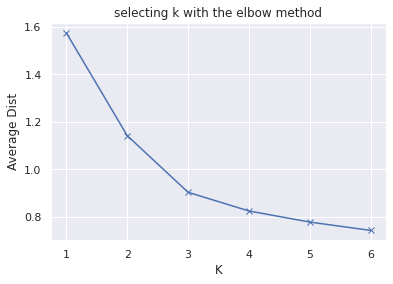

In [35]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "minkowski" for ditance calculation

clusters = range(1,7)
mink_meanDistortions =[]

for k in clusters: 
    mink_model = KMeans(n_clusters=k)
    mink_model.fit(tmp_data_Scaled)
    prediction=mink_model.predict(tmp_data_Scaled)
    mink_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,mink_model.cluster_centers_,"minkowski", p = 4),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, mink_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

Text(0.5, 1.0, 'selecting k with the elbow method')

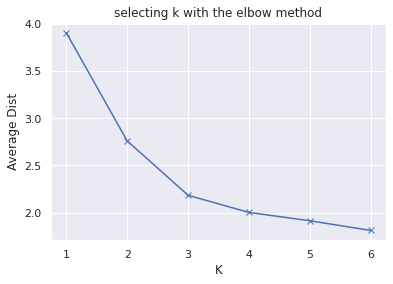

In [36]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "city block" for ditance calculation

clusters = range(1,7)
city_meanDistortions =[]

for k in clusters: 
    model = KMeans(n_clusters=k)
    model.fit(tmp_data_Scaled)
    prediction=model.predict(tmp_data_Scaled)
    city_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,model.cluster_centers_,"cityblock"),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, city_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

Text(0.5, 1.0, 'selecting k with the elbow method')

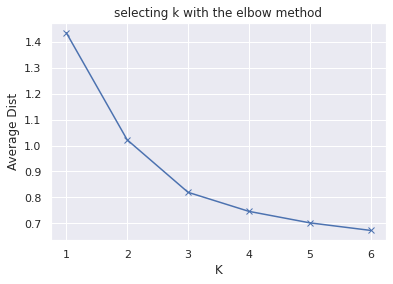

In [37]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "chebyshev" for distance calculation

clusters = range(1,7)
cheby_meanDistortions =[]

for k in clusters: 
    cheby_model = KMeans(n_clusters=k)
    cheby_model.fit(tmp_data_Scaled)
    prediction=cheby_model.predict(tmp_data_Scaled)
    cheby_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,cheby_model.cluster_centers_,"chebyshev"),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, cheby_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

### Plot all of the distance methods together on one graph to compare each method

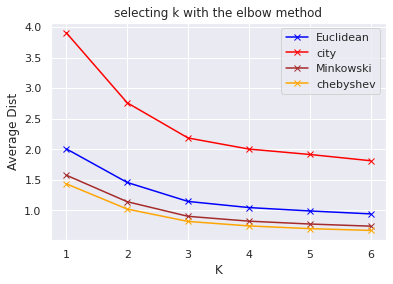

<Figure size 72x72 with 0 Axes>

In [38]:



plt.plot(clusters,euc_meanDistortions,"bx-", label = "Euclidean", color= "blue")
plt.plot(clusters,city_meanDistortions,"bx-", label = "city", color = "red")
plt.plot(clusters,mink_meanDistortions,"bx-", label = "Minkowski", color = "brown")
plt.plot(clusters,cheby_meanDistortions,"bx-", label = "chebyshev",color = "orange")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.legend()
plt.title("selecting k with the elbow method")
plt.figure(figsize= (1,1))
plt.show()

In [39]:
### insights on comparing of the different elbow methods using the differnt distances
# - All 3 of the minkowkski, euclidean, and chebyshev are relatively similar.
#    - Cityblock method had the highest amount of distance between clusters and using this shows the greatest distance between when k = 1
#    to k = 3, therefore using this ultimately to decide the appropriate k for further cluster profiling.

### insights on the elbow method
- Through each method of plotting the elbow method using the 4 different distances(euclidean, minkowski, cityclock , and chebyshev. 
    - Elbow method depicts each time as k = 3 for optimal solution.
    - With the different the methods the ditance between each cluster changes. 
    - Highest distance occurs with the cityblock method.

In [40]:
# fitting K-means model

kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(tmp_data_Scaled)

 

# adding kmeans cluster labels to the original and scaled dataframes
tmp_data_Scaled["KM_segments"] = kmeans.labels_

#df2 = df.copy()
tmp_data["KM_segments"] = kmeans.labels_

 

# cluster profiling

km_cluster_profile = tmp_data.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
tmp_data.groupby("KM_segments")["Total_Credit_Cards"].count().values
)

km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


For n_clusters = 2, the silhouette score is 0.5140347596040015)
For n_clusters = 3, the silhouette score is 0.6047553572064851)
For n_clusters = 4, the silhouette score is 0.3952531823360013)
For n_clusters = 5, the silhouette score is 0.27663396860765416)
For n_clusters = 6, the silhouette score is 0.2594087492506047)
For n_clusters = 7, the silhouette score is 0.25179673392804397)


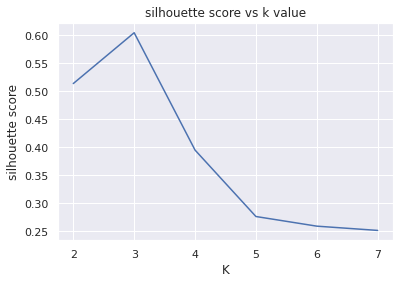

In [70]:
# the elbow occurs when k = 3 
# profile the clusters when k = 3 

# make empty list for the silhoette scores to be placed in
sil_score = []
# define a range of number of clusters to try
cluster_list = range(2, 8)

for n_clusters in cluster_list:
  #instantiate Kmeans cluster model 
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  # make predictions and fit with the tmp_data_scaled data frame
  preds = clusterer.fit_predict((tmp_data_Scaled))
  
  # define the silhouette score funtion and pass is the scaled data frame and the mode 
  # predictions
  score = silhouette_score(tmp_data_Scaled, preds)

  # append the silhouette score to the empty list 
  sil_score.append(score)
  
  # print the individual siilhouette score for each value of k
  print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

plt.xlabel('K')
plt.ylabel("silhouette score")

plt.title("silhouette score vs k value")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a3b131590>,
      dtype=object)

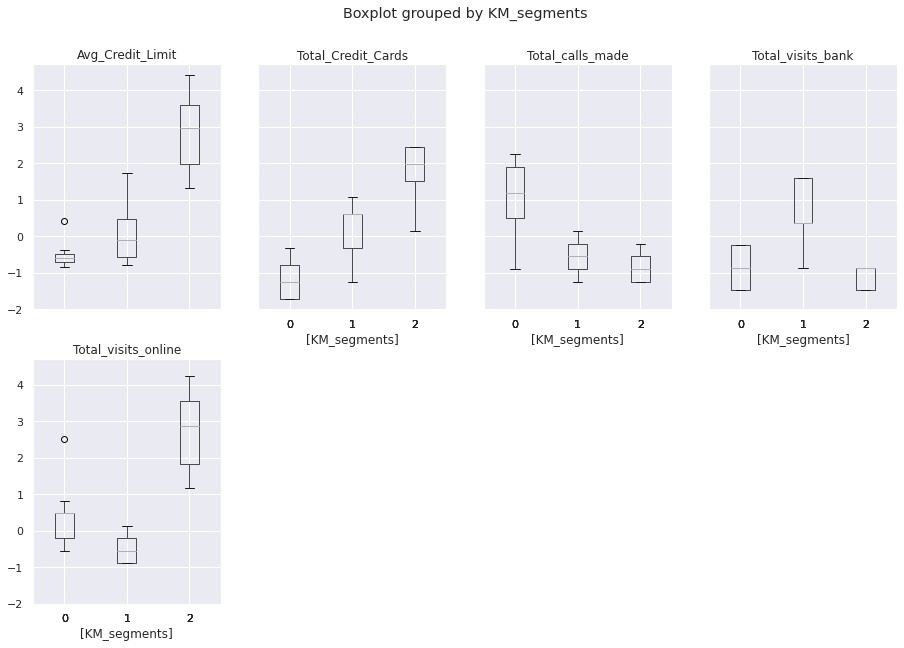

In [42]:
tmp_data_Scaled.boxplot(by='KM_segments', layout = (2,4),figsize=(15,10))

In [43]:
### Insights with cluster profiling for k means clustering



# Hierarchial Clustering

### plot dendograms and determine what best amount clusters to use
- Instantiate Clustering algorithm
- Fit Model
- plot dendogram and determine best # of clusters based upon cophentic corr

In [44]:
dist_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]


# determine method and linkage that gives you max value of cop. correlation

# use two for loops to iterate through the distance metrics and the 
# linkage methods

for metrics in dist_metrics:
  for link in linkage_methods:
    # instantiate linkage object
    #calculate a linkage for each metric and linkage method 
    Z= linkage(tmp_data_Scaled, metric= metrics, method = link )
    # use the linkage Z to calculate the cophenetic correlation
    C, cophentic_distance = cophenet(Z, pdist(tmp_data_Scaled))
    print("the cophenetic corr for distance",metrics, "and linkage", link, C )


the cophenetic corr for distance euclidean and linkage single 0.8981791108157513
the cophenetic corr for distance euclidean and linkage complete 0.8844207258608942
the cophenetic corr for distance euclidean and linkage average 0.9102691112621796
the cophenetic corr for distance euclidean and linkage weighted 0.9069999252384202
the cophenetic corr for distance chebyshev and linkage single 0.8142004375043415
the cophenetic corr for distance chebyshev and linkage complete 0.8565360723350399
the cophenetic corr for distance chebyshev and linkage average 0.9092248615295281
the cophenetic corr for distance chebyshev and linkage weighted 0.9046661477870559
the cophenetic corr for distance mahalanobis and linkage single 0.8650806042953475
the cophenetic corr for distance mahalanobis and linkage complete 0.6100510675083289
the cophenetic corr for distance mahalanobis and linkage average 0.8419295288198602
the cophenetic corr for distance mahalanobis and linkage weighted 0.8593103662232753
the c

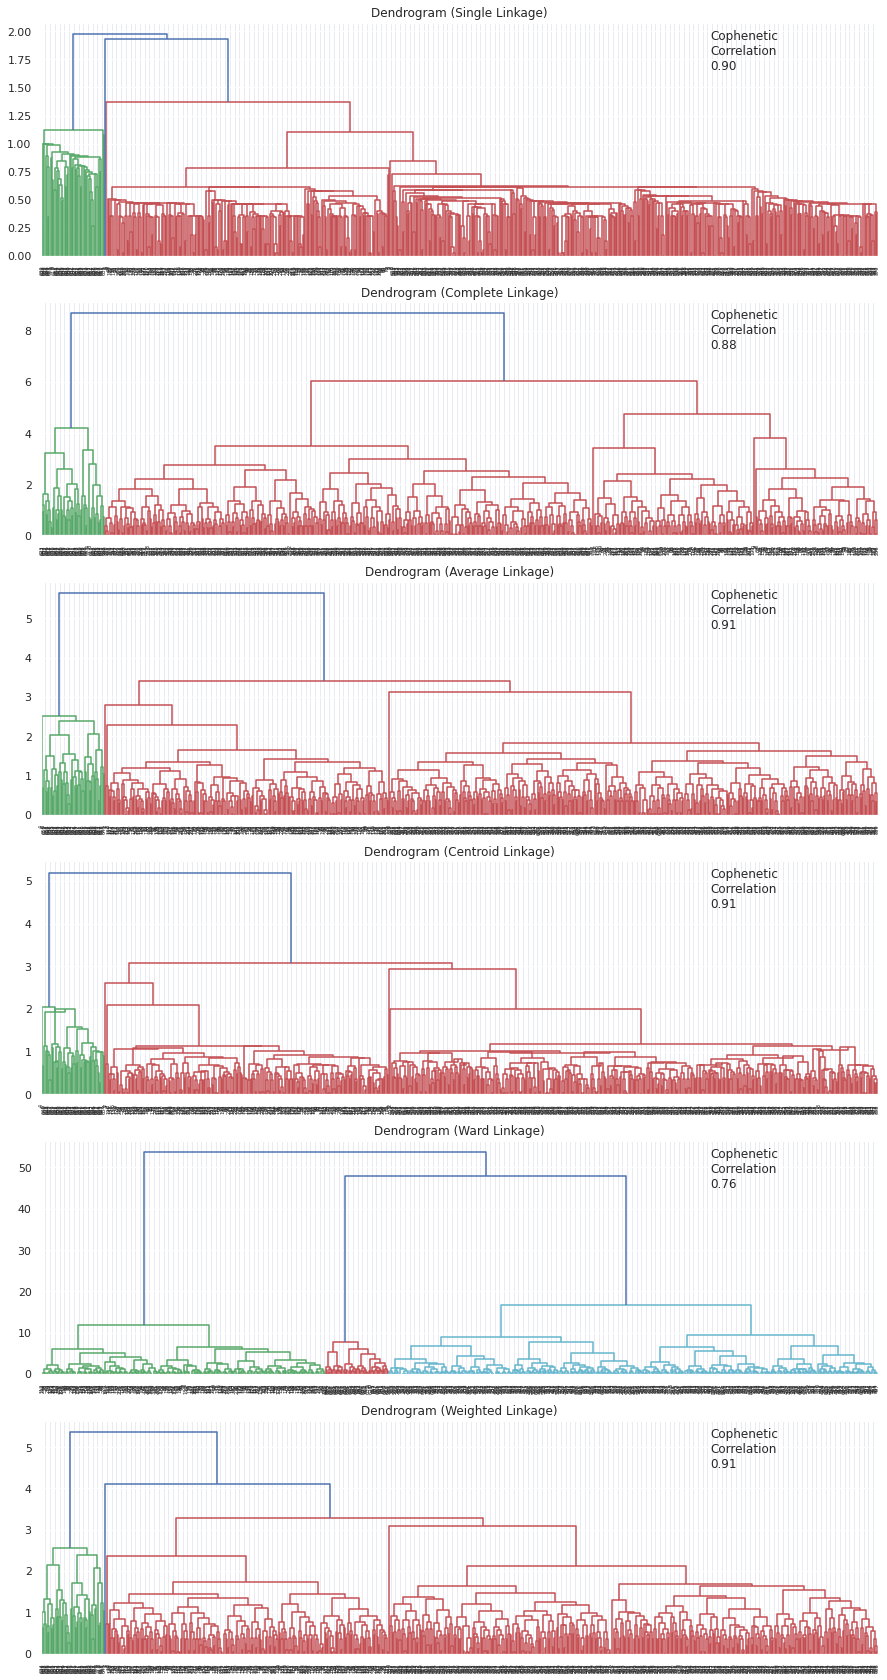

In [45]:
# the highest cophenetic correlation uses euclidean as distance and average as linkage.

# Explore different linkage methods using euclidean distances and plot dendograms of each.

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation

compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(tmp_data_Scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(tmp_data_Scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [46]:
# create dataframe to compare columns
compare_cols = ["Linkage", "Cophenetic Coefficient"]
# make dataframe from cophenetic corr and compare columns
compare_df = pd.DataFrame(compare, columns = compare_cols)
compare_df

,Linkage,Cophenetic Coefficient
0,single,0.898179
1,complete,0.884421
2,average,0.910269
3,centroid,0.906845
4,ward,0.756625
5,weighted,0.907000


In [47]:
max(compare_df["Cophenetic Coefficient"])

0.9102691112621796

### Insights on hierarchial clustering
- THe optimal number of clusters to use is 3 
- The dendogram with average linkage, results in a .91 Coph. Corr
  - the avg linkage method showed good separation in height between each cluster, this is why it has the highest coph. corr.
- The second highest is with the centroid linkage.

#### Cluster profiling with euclidean and average distance with k = 3


In [48]:
hieracrchial_cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
hieracrchial_cluster.fit(tmp_data_Scaled)

# add labels to the clusters to the scaled data frame

tmp_data_Scaled["cluster_labels"] = hieracrchial_cluster.labels_
tmp_data["cluster_labels"] = hieracrchial_cluster.labels_

In [49]:
# cluster profiling

hc_cluster_profile = tmp_data.groupby("cluster_labels").mean()

hc_cluster_profile["count_in_each_segment"] = (
tmp_data.groupby("cluster_labels")["Avg_Credit_Limit"].count().values
)

hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_segments,count_in_each_segment
cluster_labels,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0,224


In [50]:
hc_cluster_profile.drop("KM_segments", axis = 1, inplace= True)

In [51]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
cluster_labels,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,224


In [52]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a38759990>,
      dtype=object)

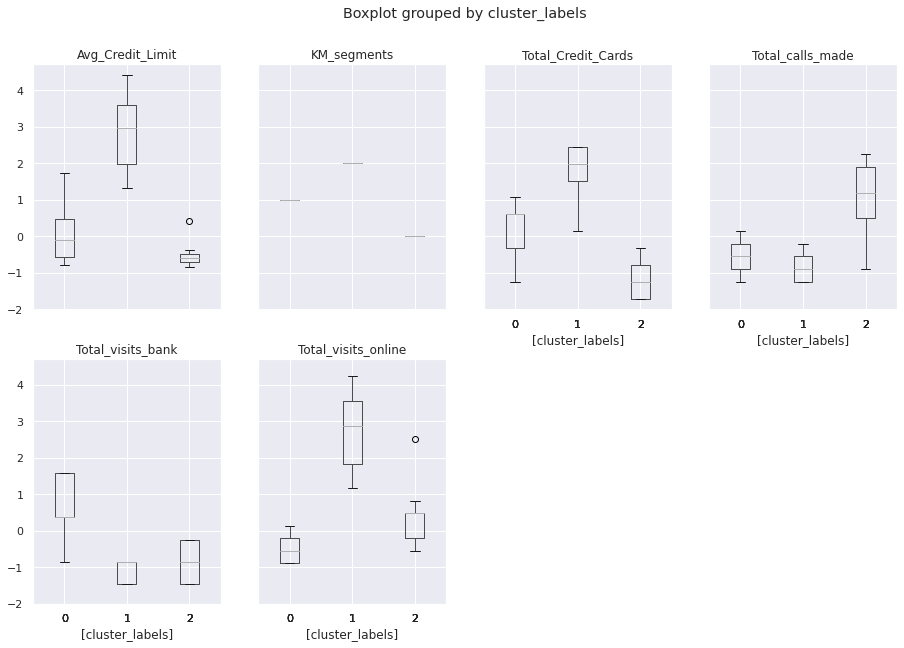

In [53]:
tmp_data_Scaled.boxplot(by='cluster_labels', layout = (2,4),figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a37bed710>,
      dtype=object)

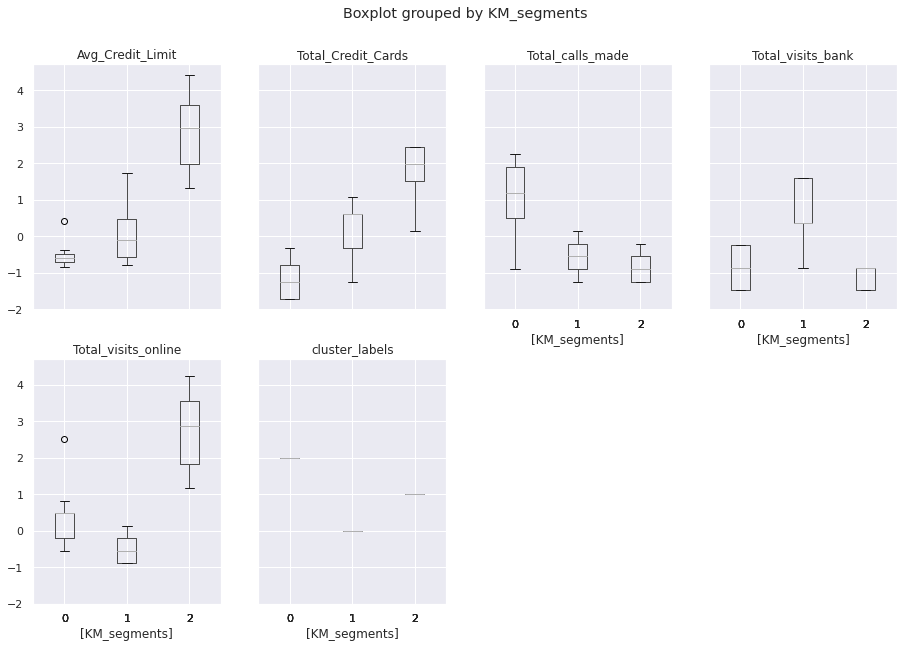

In [54]:
tmp_data_Scaled.boxplot(by='KM_segments', layout = (2,4),figsize=(15,10))

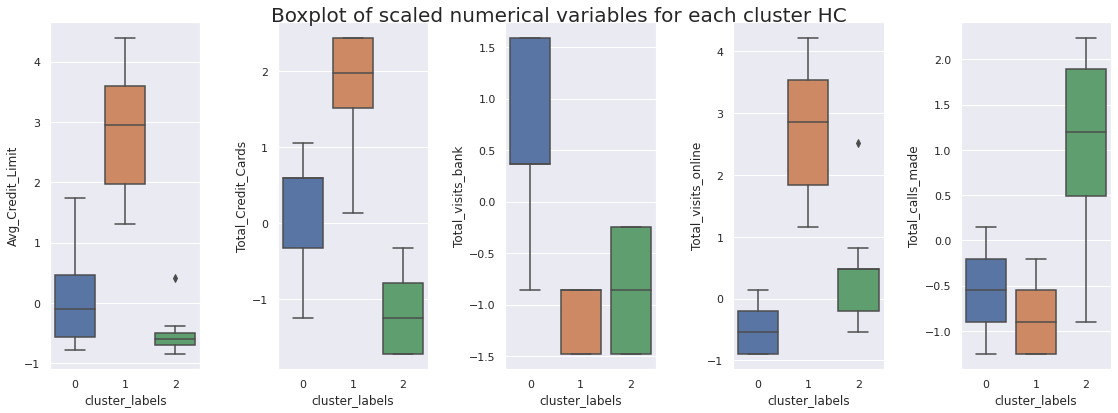

In [55]:

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster HC", fontsize=20)
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i],
        y=tmp_data_Scaled[tmp_data_Scaled.columns[counter]],
        x=tmp_data_Scaled["cluster_labels"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

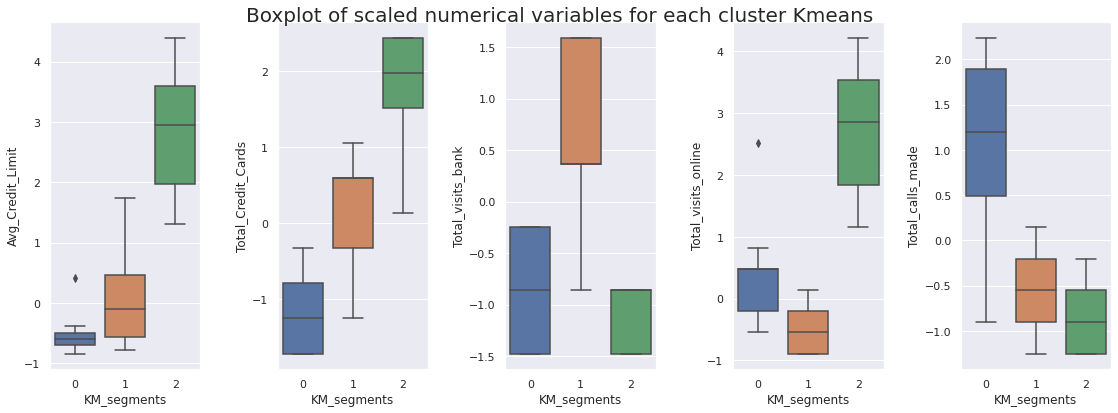

In [56]:

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster Kmeans", fontsize=20)
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i],
        y=tmp_data_Scaled[tmp_data_Scaled.columns[counter]],
        x=tmp_data_Scaled["KM_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)